In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time 
from sklearn.cluster import SpectralClustering
import concurrent.futures
from numpy import linalg as la
import scipy.cluster.vq as vq
import scipy.ndimage as ndimage
import scipy as sp
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.feature_extraction import image
from skimage.color import rgb2gray
import numpy as np
from scipy.spatial.distance import pdist, squareform\

import skimage.segmentation
import skimage.graph
import scipy.sparse.linalg
import scipy.spatial
import matplotlib.pyplot as plt 

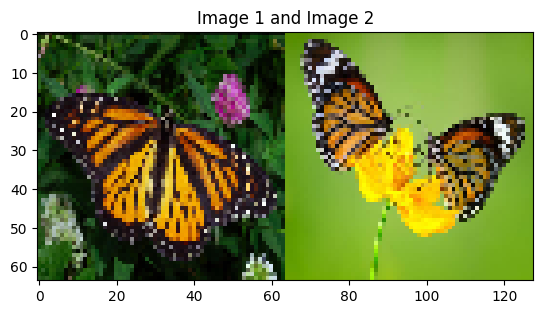

In [3]:
image1_pth = "images/image1.jpg"
image2_pth = "images/image2.jpg"
img1 = cv2.imread(image1_pth)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (64,64))
img2 = cv2.imread(image2_pth)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (64,64))
# plt.imshow(img1)
# plt.title("Image 1")
# plt.show()
# plt.imshow(img2)
# plt.title("Image 2")
# plt.show()

img_h = cv2.hconcat([img1, img2])
# Plot the images using Matplotlib
plt.imshow(img_h)
plt.title("Image 1 and Image 2")
plt.show()

In [4]:
def spect(img, k):
    # Convert the image to grayscale and flatten it
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_f = img_g.flatten()

    # Apply spectral clustering
    sc = SpectralClustering(n_clusters=k, affinity="nearest_neighbors", assign_labels="kmeans")
    labels = sc.fit_predict(img_f.reshape(-1, 1))

    # Reshape the labels to the original image shape
    labels = labels.reshape(img.shape[0], img.shape[1])

    # Plot the original image and the segmented image
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img)
    axs[0].set_title("Original Image" + str(k))
    axs[1].imshow(labels, cmap="tab20")
    axs[1].set_title("Segmented Image")
    plt.show()

/home/iiticos/Desktop/College/8th sem/CV/Assignment2/.env/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


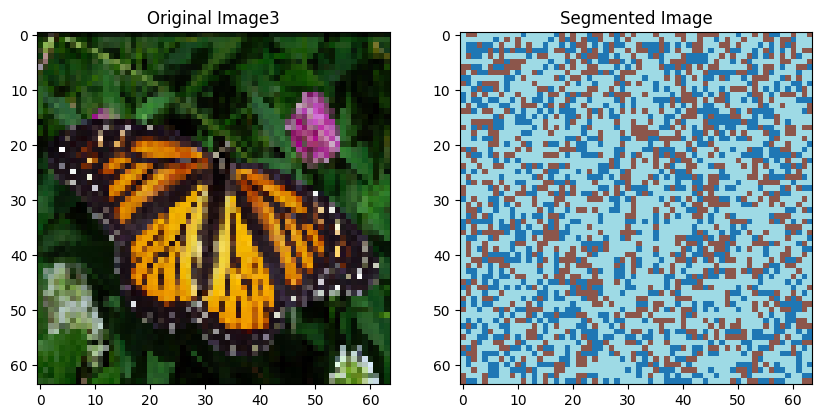

/home/iiticos/Desktop/College/8th sem/CV/Assignment2/.env/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


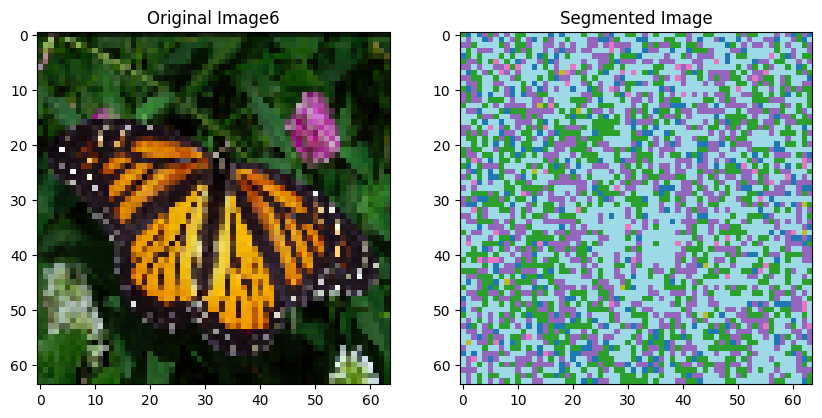

/home/iiticos/Desktop/College/8th sem/CV/Assignment2/.env/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


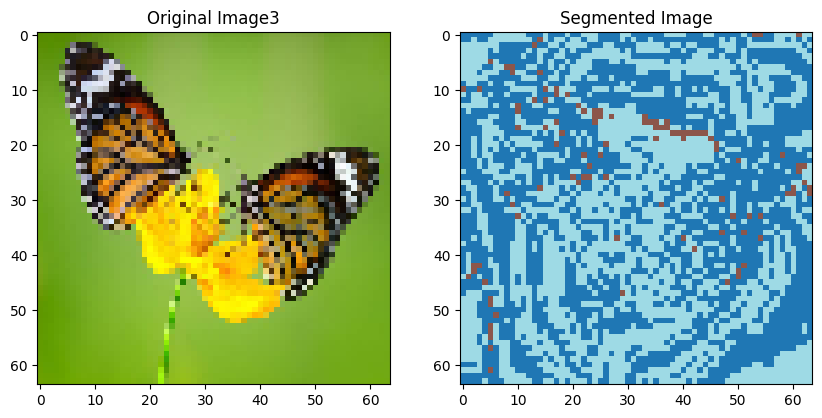

/home/iiticos/Desktop/College/8th sem/CV/Assignment2/.env/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


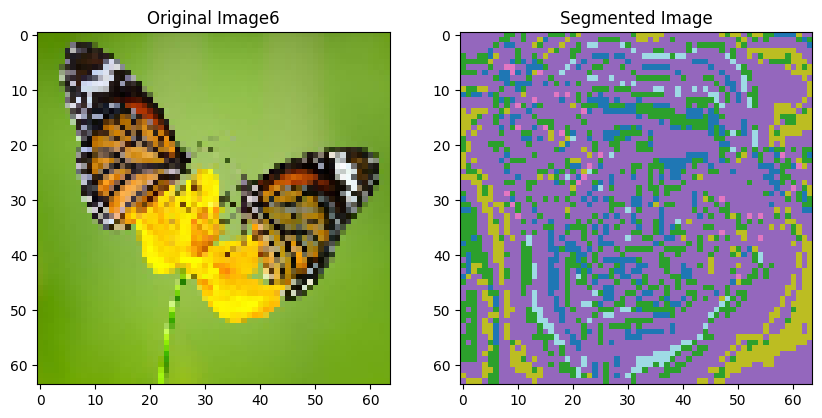

In [12]:
img = [img1, img2]
k = [3,6]

for i in range(len(img)):
    for k_ in k:
        spect(img[i], k_)

In [13]:
def kmeans(image,k=5,iters=100): # expects img in rgb
    img=image.copy()
    h,w,c=img.shape
    orig=image.copy()
    Klusters=np.random.randint(0,255,size=(k,3))
    # print('init clusters', Klusters)
    for it in range(iters):
        img=image.copy()
        for i in range(h):
            for j in range(w):
                pnt=img[i][j]
                diff=np.sqrt(np.sum((Klusters-pnt)**2,axis=1))
                c=np.argmin(diff)
                img[i][j]=Klusters[c]
        loss=0
        l=[]
        for i in range(k):
            Ys,Xs,c=np.where(img==Klusters[i])
            kth_points=orig[Ys,Xs]
            l.append(np.sum(Klusters[i]-kth_points))
            Klusters[i]=np.mean(kth_points,axis=0)
        loss=sum(l)    
        # print('Cluster centroids at iteration-{}'.format(it+1),import numpy as np
        # print('loss at iteration-{}'.format(it+1),loss)
    return img

/home/iiticos/Desktop/College/8th sem/CV/Assignment2/.env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/iiticos/Desktop/College/8th sem/CV/Assignment2/.env/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/tmp/ipykernel_23671/3027523503.py:21: RuntimeWarning: invalid value encountered in cast
  Klusters[i]=np.mean(kth_points,axis=0)


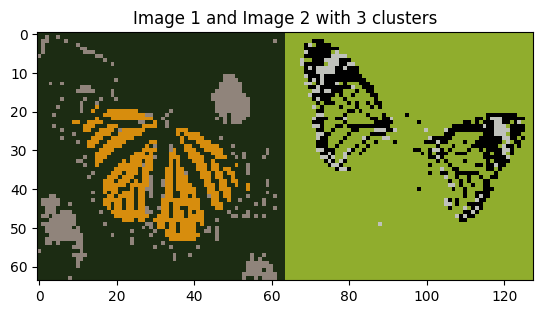

In [14]:
seg_img1_3 = kmeans(img1, 3)
seg_img2_3 = kmeans(img2, 3)
img_h = cv2.hconcat([seg_img1_3, seg_img2_3])
# Plot the images using Matplotlib
plt.imshow(img_h)
plt.title("Image 1 and Image 2 with 3 clusters")
plt.show()

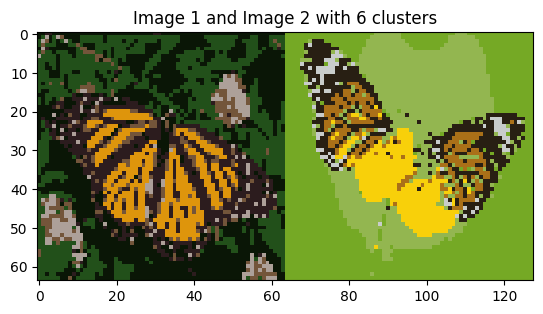

In [15]:
seg_img1_6 = kmeans(img1, 6)
seg_img2_6 = kmeans(img2, 6)
img_h = cv2.hconcat([seg_img1_6, seg_img2_6])
# Plot the images using Matplotlib
plt.imshow(img_h)
plt.title("Image 1 and Image 2 with 6 clusters")
plt.show()

In [5]:
def radio_cut(img,k):
    start = time.time()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = img.astype(bool)
    img = img.astype(float)
    # img += 1 + 0.2 * np.random.randn(*img.shape)
    graph = image.img_to_graph(img, mask=mask)
    # print(graph)
    # graph.data = np.exp(-graph.data / graph.data.std())

    A = graph
    D = np.diag(np.ravel(np.sum(A,axis=1)))
    L = D - A

    # U has matrix of all eigenvectors arranged and l has sorted eigenvalues
    l, U = la.eigh(L)

    means, labels = vq.kmeans2(U[:,1:k], k)
    # print(U.shape)
    # print(means)
    # print(labels.size)
    # print(np.unique(labels))

    label_im = -np.ones(mask.shape)
    label_im[mask] = labels

    # plt.imshow(img)
    # plt.matshow(label_im)
    # plt.show()

    end = time.time()
    print("Time taken for spectral clustering: ", end-start)
    return img, label_im


Time taken for spectral clustering:  16.16374135017395


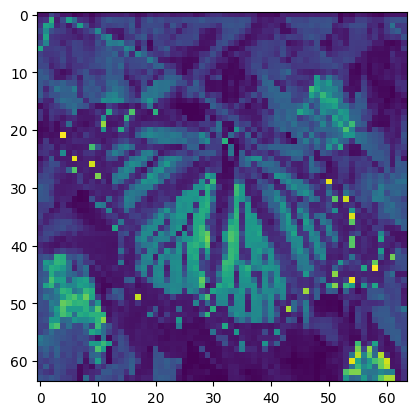

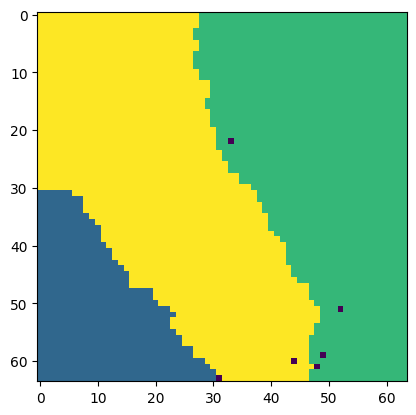

In [14]:
img, label_img = radio_cut(img1, 3)
plt.imshow(img)
plt.show()
plt.imshow(label_img)
plt.show()

Time taken for spectral clustering:  12.842406034469604


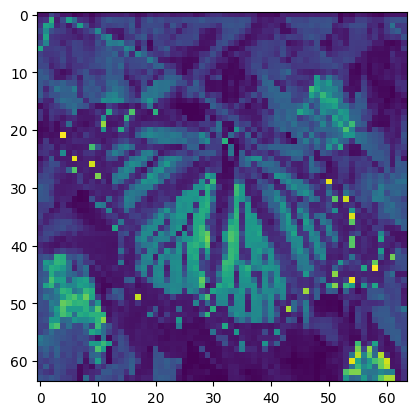

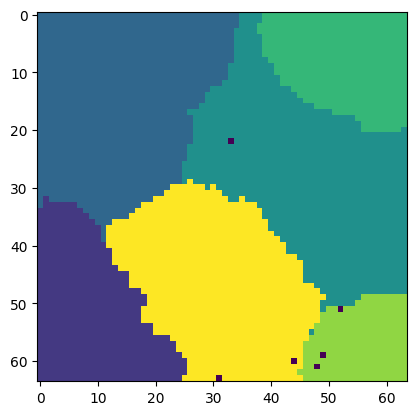

In [15]:
img, label_img = radio_cut(img1, 6)
plt.imshow(img)
plt.show()
plt.imshow(label_img)
plt.show()